<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<font size=6> MICROESTRUCTURA Y SISTEMAS DE TRADING  </font> <br>

<font size = 5> Lab 1: Inversión de Capital  </font><br>

<font size=5> IF Luis Enrique Sánchez Ruiz </font> <br>

<font size = 4> GitHub: <a href=''>Link</a></font>

<p style='text-align: justify;'><font color= #6B6B6B> <font size = 3>Para este primer laboratorio se busca comparar una estrategia de inversion pasiva contra una inversion activa para poder observar su diferente comportamiento. Se evaluara para el periodo de enero del 2020 hasta enero del 2022. La inversion pasiva se evaluara en 2 periodos, uno pre-pandemia y otro en-pandemia. Para la estrategia Activa se tomara el periodo completo y se hara un rebalanceo del portafolio, estaremos tomando el NAFTRAC.</font></p>

# Introducción

<p style='text-align: justify;'><strong>¿Qué estrategia de inversión propondrías si tu trabajo fuera invertir 1 Millón de pesos?</strong>
    
Se plantean dos posibles inversiones: PASIVA Y ACTIVA

Para la inversion pasiva tomamos el lapso de tiempo 
pre-pandemia de: Enero de 2018 a Enero de 2020
En pandemia de: febrero de 2020 a Enero de 2022
   
Para la inversion activa aplicamos un rebalanceo cada mes durante todo el lapso de tiempo   

# Librerías Necesarias

En requirements.txt se muestran las librerias necesarias para esste lab1:
- pandas
- chart_studio
- datetime
- os
- numpy
- jupyter


In [20]:
from data import *
from functions import *
from os.path import isfile, join
import pandas as pd
import numpy as np
from os import listdir, path
import warnings
warnings.filterwarnings('ignore')

Estas son las librerias necesarias para ejecutar correctamente este codigo, asi como lospPrecios históricos de NAFTRAC.

# DATOS

Los datos que necesitamos son los precios historicos del NAFTRAC que descargamos previamente en el archivo de files. Tomamos los datos desde Enero de 2018 hasta Enero del 2022. En estos archivos tenemos las acciones que conforman el indice mes a mes, asi como la ponderacionnde cada una de ellas.

In [21]:
data = pd.read_csv("files/NAFTRAC_20220126.csv", skiprows=2)
data

,Ticker,Nombre,Clase de activo,Peso (%),Precio,Acciones,Valor de mercado,Valor nominal,Sector,Unnamed: 9,ISIN,Bolsa de valores,Ubicación,Moneda,Mercado de divisas,Tipo de Cambio
0,AMXL,AMERICA MOVIL L,Equity,14.63,19.81,"424,279,747.00","8,404,981,788.07","8,404,981,788.07",Comunicación,2667470,MXP001691213,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
1,WALMEX*,WALMART DE MEXICO V,Equity,11.36,69.40,"94,073,501.00","6,528,700,969.40","6,528,700,969.40",Productos básicos de consumo,BW1YVH8,MX01WA000038,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
2,GFNORTEO,GPO FINANCE BANORTE,Equity,10.40,131.31,"45,532,623.00","5,978,888,726.13","5,978,888,726.13",Financieros,2421041,MXP370711014,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
3,FEMSAUBD,FOMENTO ECONOMICO MEXICANO,Equity,9.78,164.75,"34,127,125.00","5,622,443,843.75","5,622,443,843.75",Productos básicos de consumo,2242059,MXP320321310,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
4,GMEXICOB,GRUPO MEXICO B,Equity,8.85,87.88,"57,850,729.00","5,083,922,064.52","5,083,922,064.52",Materiales,2643674,MXP370841019,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
5,CEMEXCPO,CEMEX CPO,Equity,6.13,12.53,"281,218,151.00","3,523,663,432.03","3,523,663,432.03",Materiales,2406457,MXP225611567,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
6,TLEVISACPO,GRUPO TELEVISA,Equity,3.24,39.64,"47,003,394.00","1,863,214,538.16","1,863,214,538.16",Comunicación,2380108,MXP4987V1378,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
7,GAPB,GRUPO AEROPORTUARIO DEL PACIFICO,Equity,3.03,270.09,"6,451,836.00","1,742,576,385.24","1,742,576,385.24",Industriales,B0ZV104,MX01GA000004,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
8,BIMBOA,GRUPO BIMBO A,Equity,2.98,62.39,"27,434,873.00","1,711,661,726.47","1,711,661,726.47",Productos básicos de consumo,2392471,MXP495211262,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
9,ASURB,GRUPO AEROPORTUARIO DEL SURESTE B,Equity,2.56,402.65,"3,654,263.00","1,471,388,996.95","1,471,388,996.95",Industriales,2639349,MXP001661018,Bolsa Mexicana De Valores,México,MXN,MXN,1.0


Depues decargamos los precios historicos de cada una de las acciones en los archivos de NAFTRAC para el mismo periodo de tiempo

# Inversión pasiva

La estrategia pasiva consiste en otorgar nuestro capital y no hacer rebalanceo a lo largo del periodo, buscando imitar el NAFTRAC. Para ellos consideraremos algunos supuestos para este laboratorio:
- Se consideran las comisiones a pagar por cada rebalanceo = 0.00125 del valor de la operación (títulos*precio*comisión).
- Solo se permiten operaciones de compra (posición en largo).
- Las operaciones se ejecutan al precio de mercado y se considera - un solo precio de compra o de venta para todos los títulos en la operación.
- Utiliza los archivos, NAFTRAC_holdings.zip, (son los rebalanceos mensuales históricos del NAFTRAC).
- Considera un capital inicial de 1 Millón de pesos.
- Utilizar las ponderaciones del primer archivo (Considerando el capital de 1 Millón de pesos).


<strong>Se consideró como periodo:</strong>
- Pre-Pandemia: Enero-2018 a Enero-2020
- En-Pandemia: Febrero-2020 a Enero-2022


In [22]:
abspath = path.abspath("files/") # Se crea ruta de los archivos

files = [f[8:-4] for f in listdir(abspath) if isfile(join(abspath, f))] # Se obtiene la fecha del nombre de los archivos
files = ["NAFTRAC_" + i.strftime("%Y%m%d") for i in sorted(pd.to_datetime(files))] # Se agrega NAFTRAC al nombre de los archivos e indice de tiempo

naftrac_complete = df_of_data(files)# Se crea DF con todos los datos del Naftrac

dates = get_dates(files) # Se crea una lista con las fechas de los archivos

naftrac_complete = conversion_cash(naftrac_complete)  # KOFL.MX, KOFUBL.MX, USD.MXN, BSMXB.MX, NMKA.MX  lo pasamos a cash quitandolo

naftrac_stats = naftrac_complete[['Ticker', 'Peso (%)']]# Creo un dataframe con (date,Ticker,y su peso%)

all_tickers = list(naftrac_stats['Ticker'].unique()) # Creo una lista con todos los nombres unicos de los tickers

closes = price_adj_close(all_tickers, dates[0],dates[-1], freq="d")# Obtenemos los precios

monthly_closes = closes[closes.index.isin(dates)] # Consideramos los precios de fechas en los archivos

naftrac_stats = df_act_prices(naftrac_stats, monthly_closes, dates) #con yfinance agregamos los precios
naftrac_stats

,Ticker,Date,Peso (%),Close
0,AMXL.MX,2018-01-31,0.1331,15.6425
1,FEMSAUBD.MX,2018-01-31,0.1269,168.046
2,GFNORTEO.MX,2018-01-31,0.0951,104.78
3,WALMEX.MX,2018-01-31,0.076,43.2468
4,GMEXICOB.MX,2018-01-31,0.0754,52.5809
...,...,...,...,...
1617,MEGACPO.MX,2022-01-26,0.0061,63.77
1618,LIVEPOLC-1.MX,2022-01-26,0.0061,95.69
1619,BOLSAA.MX,2022-01-26,0.0053,34.87
1620,LABB.MX,2022-01-26,0.0047,19.72


Este df muestra los historicos del NAFTRAC con sus pesos porcentuales en cada una de sus posiciones, asi como tambien muestra los precios de cierre de cada activo. Con estos datos estaremos trabajando el proyecto.

## - PRE-Pandemia

Para la inversion pasiva no es necesario hacer rebalanceo por lo que solo se pafara comision la primera y unica vez e iremos observando como evoluciona el precio a lo largo del tiempo. 

In [23]:
comision = 0.00125 
capital = 1000000
portafolio_pasivo_prepandemia = inv_pasiva_posicion(naftrac_stats, dates[0], capital, comision)
lapso_prepandemia = dates[0:25]
portafolio_pasivo_prepandemia.head(10)

,Ticker,Date,Peso (%),Close,Acciones,$ Total,Comisión
0,AMXL.MX,2018-01-31,0.1331,15.6425,8508,133086,166.358
1,FEMSAUBD.MX,2018-01-31,0.1269,168.046,755,126875,158.593
2,GFNORTEO.MX,2018-01-31,0.0951,104.78,907,95035.9,118.795
3,WALMEX.MX,2018-01-31,0.076,43.2468,1757,75984.7,94.9808
4,GMEXICOB.MX,2018-01-31,0.0754,52.5809,1433,75348.4,94.1856
5,CEMEXCPO.MX,2018-01-31,0.0744,15.0892,4930,74389.5,92.9869
6,TLEVISACPO.MX,2018-01-31,0.0621,75.3513,824,62089.5,77.6119
7,ALFAA.MX,2018-01-31,0.0268,23.1927,1155,26787.6,33.4845
8,GAPB.MX,2018-01-31,0.0251,161.422,155,25020.4,31.2755
9,ASURB.MX,2018-01-31,0.0244,344.114,70,24088,30.11


Aqui podemos observar los Tickers, con su fecha, el peso en porcentaje que representa, close es el precio al que estaba en ese momento y al que decidimos comprar, tambien se observa el numero de acciones de cada uno de los tickers, su valor total y para finalizar la comision pagada, que sera la unica para esta inversion pasiva.

Acontinuacion se muestra:el renidmiento que se obtuvo a lo largo de los meses en este periodo de pre-pandemia que considere desde enero 2018 a enero 2020. Tambien se resta el valor de las comisiones 

In [8]:
df_pasiva_a = pasive_invstmnt_rend(portafolio_pasivo_prepandemia, lapso_prepandemia, capital, naftrac_stats)
df_pasiva_a

,capital,rend,rend_acum
timestamp,,,
2018-01-30,1000000.000000,0.000000,0.000000
2018-01-31,996737.509520,-0.003262,-0.003262
2018-02-28,942930.449963,-0.053983,-0.057070
2018-03-28,914177.444427,-0.030493,-0.085823
2018-04-30,959881.168295,0.049994,-0.040119
2018-05-31,891968.335114,-0.070751,-0.108032
2018-06-29,956524.813474,0.072375,-0.043475
2018-07-31,995816.638360,0.041078,-0.004183
2018-08-31,996247.465018,0.000433,-0.003753


Aqui se puede observar los meses, nuestro capital, el redimiento y el redieminto acumulado, se debe considerar que todo el tiempo se tomo como referencia el millon para calcular el redimiento

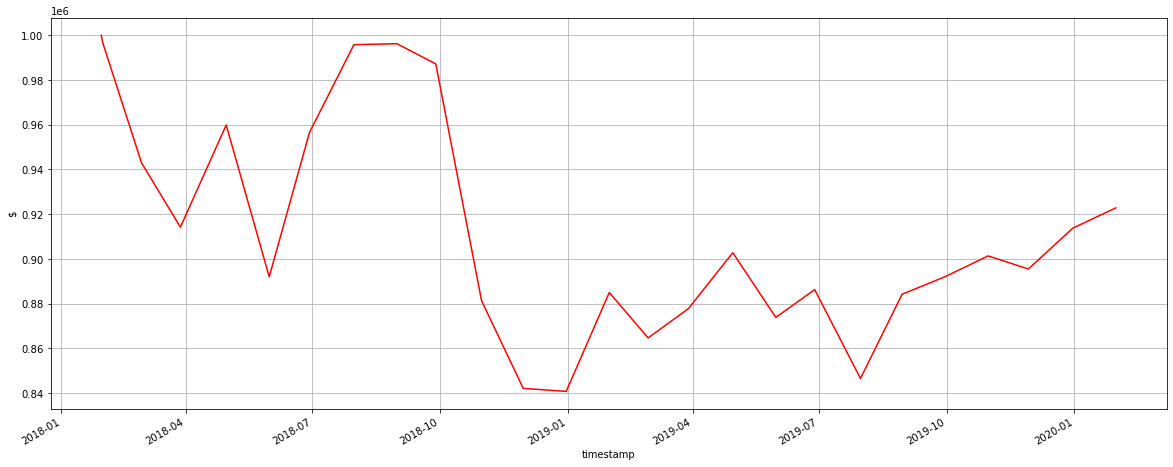

In [9]:
import matplotlib.pyplot as plt
df_pasiva_a['capital'].plot(figsize=(20,8), color='red');
plt.ylabel('$')
plt.grid()

Esta grafica nos muestra como fue evolucionando nuestro capital en este primer periodo de pre-pandemia

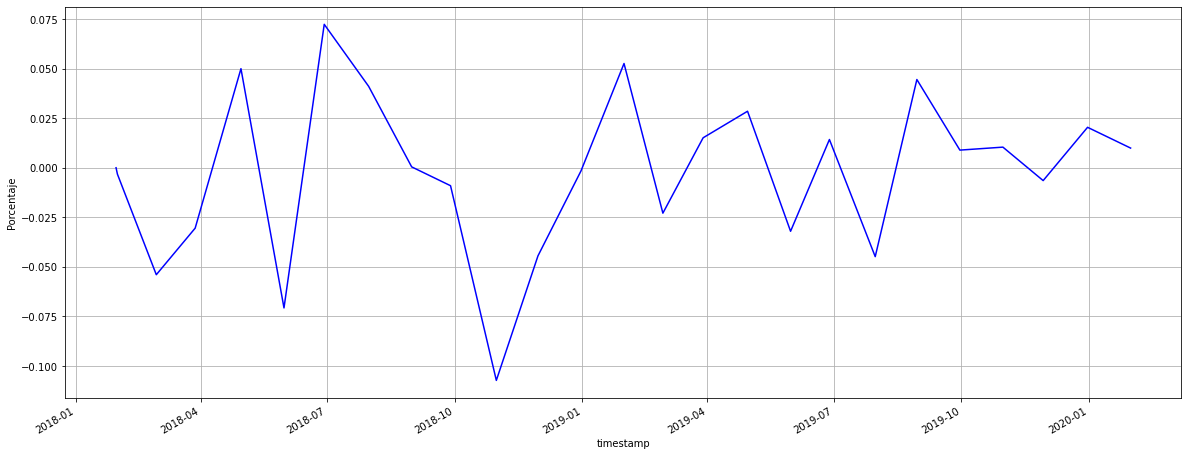

In [10]:
df_pasiva_a['rend'].plot(figsize=(20,8),color='blue')
plt.ylabel('Porcentaje')
plt.grid()

Esta grafica nos muestra la manera en que se comportaron los rendiemintos a traves de los meses observados.

### Ahora continuamos con el periodo de En-Pandemia

Para este periodo se tomo desde febrero del 2020 hasta enero del 2022, de igual manera no se aplicara rebalanceo.

In [11]:
portafolio_pasivo_enpandemia = inv_pasiva_posicion(naftrac_stats, dates[25], capital, comision)
lapso_enpandemia = dates[25:]
portafolio_pasivo_enpandemia

,Ticker,Date,Peso (%),Close,Acciones,$ Total,Comisión
817,AMXL.MX,2020-02-28,0.1446,14.53,9951,144588,180.735
818,FEMSAUBD.MX,2020-02-28,0.1181,153.351,770,118080,147.6
819,WALMEX.MX,2020-02-28,0.1116,53.5234,2085,111596,139.495
820,GFNORTEO.MX,2020-02-28,0.1043,101.804,1024,104247,130.309
821,GMEXICOB.MX,2020-02-28,0.0592,40.9291,1446,59183.4,73.9793
822,CEMEXCPO.MX,2020-02-28,0.0383,6.34,6041,38299.9,47.8749
823,TLEVISACPO.MX,2020-02-28,0.0372,36.5782,1016,37163.5,46.4544
824,GAPB.MX,2020-02-28,0.0321,202.939,158,32064.4,40.0805
825,ELEKTRA.MX,2020-02-28,0.0309,1318.34,23,30321.7,37.9021
826,ASURB.MX,2020-02-28,0.0262,317.866,82,26065,32.5813


De igaual manera que en el periodo de Pre-pandemia este dataframe podemos observar los tickers que conformaran nuestro portafolio en este periodo. Podemos ver el Ticker, la fecha, el peso en porcentaje, el precio al que estamos comprando, las acciones totales de cada ticker, el dinero total, y la comision.

Acontinuacion se muestra:el renidmiento que se obtuvo a lo largo de los meses en este periodo de En-pandemia que considere desde febrero del 2020 a enero 2022. Tambien se resta el valor de las comisiones 

In [12]:
df_pasiva_b = pasive_invstmnt_rend(portafolio_pasivo_enpandemia, lapso_enpandemia, capital, naftrac_stats)
df_pasiva_b

,capital,rend,rend_acum
timestamp,,,
2020-02-27,1.000000e+06,0.000000,0.000000
2020-02-28,9.972958e+05,-0.002704,-0.002704
2020-03-31,8.406501e+05,-0.157070,-0.159350
2020-04-30,8.827724e+05,0.050107,-0.117228
2020-05-29,8.771585e+05,-0.006359,-0.122842
2020-06-30,9.148841e+05,0.043009,-0.085116
2020-07-31,9.025742e+05,-0.013455,-0.097426
2020-08-31,9.010052e+05,-0.001738,-0.098995
2020-09-30,9.203091e+05,0.021425,-0.079691


Aqui se puede observar los meses, nuestro capital, el redimiento y el redieminto acumulado, se debe considerar que todo el tiempo se tomo como referencia el millon para calcular el redimiento

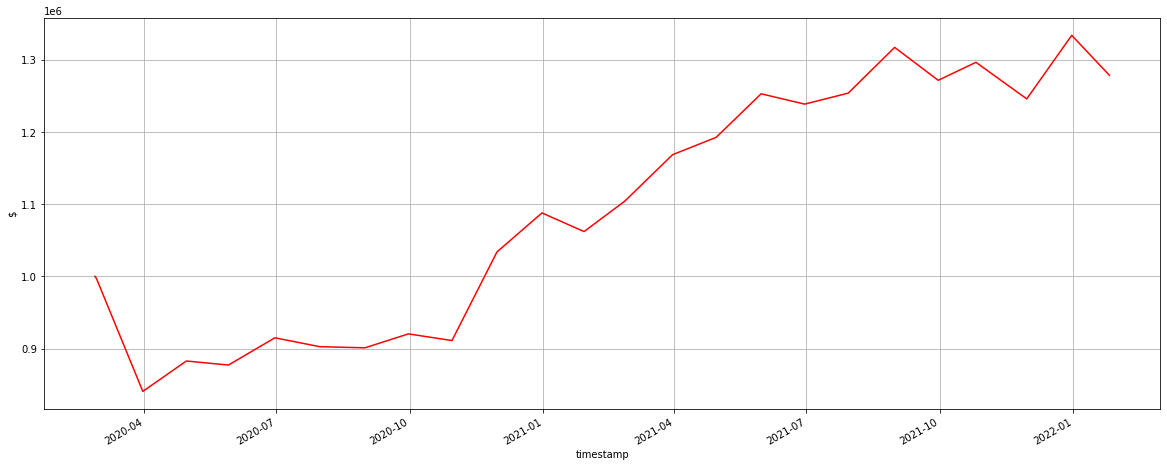

In [13]:
import matplotlib.pyplot as plt
df_pasiva_b['capital'].plot(figsize=(20,8), color = 'red');
plt.ylabel('$')
plt.grid()

Esta grafica nos muestra como fue evolucionando nuestro capital en en periodo de En-pandemia. Se puede observar como aunque al pricipio comenzamos con perdida, actualmente se recupero bastante bien la inversion.

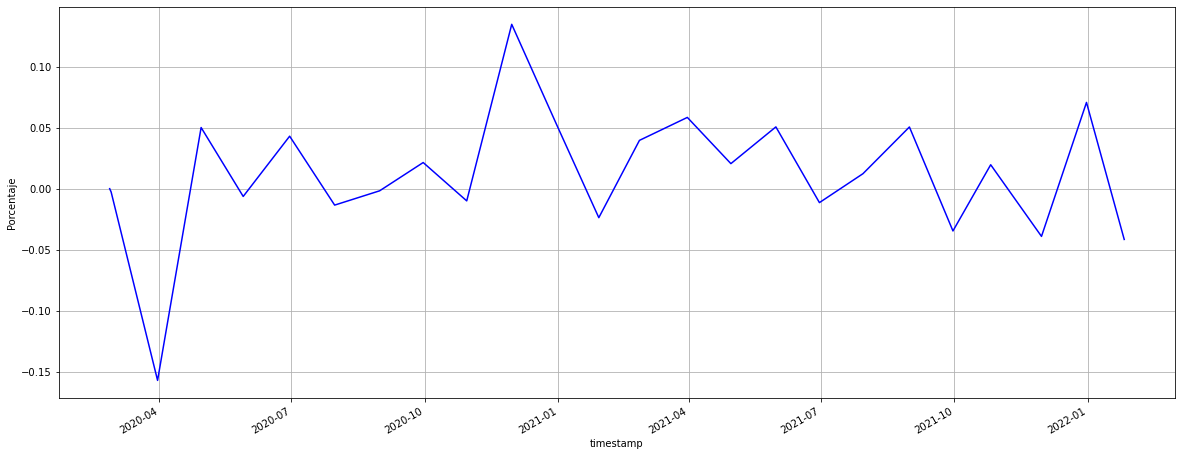

In [14]:
import matplotlib.pyplot as plt
df_pasiva_b['rend'].plot(figsize=(20,8),color='Blue')
plt.ylabel('Porcentaje')
plt.grid()

Esta grafica nos muestra la manera en que se comportaron los rendiemintos a traves de los meses observados.

## Inversion Activa

Para la inversion activa se tomara el perido desde enero del 2018 hasta enero del 2022 para de esta manera lograr comparar estos 2 escenario de inversion activa e inversin pasiva y ver como se comporta el portafolio en el perido de pandemia.

- Se estara trabajando con NAFTRAC de igual manera que con la inversion pasiva.
- Cada mes se realizara el rebalanceo y pagaran comisiones

In [15]:
comision = 0.00125 
capital = 1000000
portafolio_activo = inv_pasiva_posicion(naftrac_stats, dates[0], capital, comision)
portafolio_activo

,Ticker,Date,Peso (%),Close,Acciones,$ Total,Comisión
0,AMXL.MX,2018-01-31,0.1331,15.6425,8508,133086,166.358
1,FEMSAUBD.MX,2018-01-31,0.1269,168.046,755,126875,158.593
2,GFNORTEO.MX,2018-01-31,0.0951,104.78,907,95035.9,118.795
3,WALMEX.MX,2018-01-31,0.076,43.2468,1757,75984.7,94.9808
4,GMEXICOB.MX,2018-01-31,0.0754,52.5809,1433,75348.5,94.1856
5,CEMEXCPO.MX,2018-01-31,0.0744,15.0892,4930,74389.5,92.9869
6,TLEVISACPO.MX,2018-01-31,0.0621,75.3513,824,62089.5,77.6119
7,ALFAA.MX,2018-01-31,0.0268,23.1927,1155,26787.6,33.4845
8,GAPB.MX,2018-01-31,0.0251,161.422,155,25020.4,31.2755
9,ASURB.MX,2018-01-31,0.0244,344.114,70,24088,30.11


Aqui podemos observar las posiciones iniciales, el ticker, fecha, el peso, su precio, el numemro de acciones, el total que representa y su comision.

Como se menciona en las indicaciones el laboratorio, la estrategia de inversion activa consta de:
Estrategia de inversión activa:
- Disminuir en un 2.5% la posición en títulos de aquellos activos cuyo precio disminuyó un 5% o más.
- Aumentar en un 2.5% la posición en títulos de aquellos activos cuyo precio aumentó un 5% o más.
- Considera pagar las mismas comisiones por rebalanceo para cada cambio de posición con cada activo según aplique.

In [16]:
comision = 0.00125 # comision a pagar
capital = 1000000
portafolio_activo = inv_pasiva_posicion(naftrac_stats, dates[0], capital, comision)
portafolio_activo

,Ticker,Date,Peso (%),Close,Acciones,$ Total,Comisión
0,AMXL.MX,2018-01-31,0.1331,15.6425,8508,133086,166.358
1,FEMSAUBD.MX,2018-01-31,0.1269,168.046,755,126875,158.593
2,GFNORTEO.MX,2018-01-31,0.0951,104.78,907,95035.9,118.795
3,WALMEX.MX,2018-01-31,0.076,43.2468,1757,75984.7,94.9808
4,GMEXICOB.MX,2018-01-31,0.0754,52.5809,1433,75348.5,94.1856
5,CEMEXCPO.MX,2018-01-31,0.0744,15.0892,4930,74389.5,92.9869
6,TLEVISACPO.MX,2018-01-31,0.0621,75.3513,824,62089.5,77.6119
7,ALFAA.MX,2018-01-31,0.0268,23.1927,1155,26787.6,33.4845
8,GAPB.MX,2018-01-31,0.0251,161.422,155,25020.4,31.2755
9,ASURB.MX,2018-01-31,0.0244,344.114,70,24088,30.11


Cargamos los datos iniciales de nuestro portafolio.

In [17]:
naftrac_stats_active = limpia_activos(naftrac_stats, portafolio_activo)
naftrac_stats_active

,Ticker,Date,Peso (%),Close
0,AMXL.MX,2018-01-31,0.1331,15.6425
1,FEMSAUBD.MX,2018-01-31,0.1269,168.046
2,GFNORTEO.MX,2018-01-31,0.0951,104.78
3,WALMEX.MX,2018-01-31,0.076,43.2468
4,GMEXICOB.MX,2018-01-31,0.0754,52.5809
...,...,...,...,...
1615,ALSEA.MX,2022-01-26,0.0066,40.79
1617,MEGACPO.MX,2022-01-26,0.0061,63.77
1618,LIVEPOLC-1.MX,2022-01-26,0.0061,95.69
1620,LABB.MX,2022-01-26,0.0047,19.72


Aqui se muestra nuestros datos, se ira calculando el cash con forme vayn pasando los meses

In [18]:
trading_activo = trading_bot(naftrac_stats_active)
trading_activo

,Ticker,Date,Close,Change,buy,sell
44,AC.MX,2018-02-28,114.028,-0.0311736,0,0
75,AC.MX,2018-03-28,109.557,-0.0392083,0,0
108,AC.MX,2018-04-30,112.651,0.0282395,0,0
139,AC.MX,2018-05-31,106.151,-0.057699,0,1
172,AC.MX,2018-06-29,108.44,0.0215574,0,0
...,...,...,...,...,...,...
1453,WALMEX.MX,2021-09-30,69.4482,-0.0186118,0,0
1487,WALMEX.MX,2021-10-26,72.3993,0.0424926,0,0
1521,WALMEX.MX,2021-11-30,67.0581,-0.0737734,0,1
1555,WALMEX.MX,2021-12-31,76.09,0.134687,1,0


En este df nos muestra el comportamineto del mismo ticker con respecto a su mes pasado en la columna de change, se creo una columna donde nos indica si se debe compar o vender o no hacer ninguna accion tomando en cuanta la estrategia señalada para la inversion activa.

## Conclusion

Fun muy interesante poder observar el comportamiento de la inversion pasiva a lo largo del tiempo y como se comporto durante la pandemia, donde se pudo ver como afecto pero tuvo un buen retorno conforme sigueron trascurriendo los meses. La inversion activa fue un poco mas complicada de realizar pero se logro obtener las indicacione de compra y venta.